#### import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
stats = pd.read_csv('finalstats.csv')

In [4]:
stats = stats[stats.highestCharacterLevel != 0.0]

In [5]:
stats = stats.drop(['activitiesEntered', 'activitiesWon','totalDeathDistance','averageDeathDistance',
                    'bestSingleGameScore', 'objectivesCompleted', 'weaponKillsSubmachinegun',
                    'allParticipantsCount', 'allParticipantsScore', 'allParticipantsTimePlayed',
                    'totalActivityDurationSeconds', 'teamScore'], axis=1)

#### test train split

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(stats, test_size=0.3)

#### model

In [7]:
from sklearn.preprocessing import StandardScaler
std_train = StandardScaler().fit_transform(train)
std_train

array([[ 0.12554634,  0.89028273,  0.45800472, ...,  0.95305049,
         0.47920546,  0.43966431],
       [ 0.37749516,  0.99011488,  0.85642764, ...,  0.51403121,
         0.47920546,  1.00626632],
       [-0.54631717, -0.68424393, -0.61055711, ..., -1.92053023,
         0.47920546, -2.13365318],
       ..., 
       [-0.54631717, -0.44551487, -0.46695591, ..., -0.20436397,
         0.47920546, -2.13365318],
       [ 2.84099468, -0.12323064, -0.06430943, ...,  0.8732288 ,
         0.47920546,  0.73870426],
       [ 0.62944397,  1.27333435,  1.30553334, ..., -0.20436397,
         0.47920546,  1.01413579]])

#### KMeans

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, n_init=10)
train_fit = kmeans.fit(std_train)
X = kmeans.fit_transform(std_train)
kmeans_train = kmeans.fit_predict(std_train)

In [80]:
kmeans_train

array([2, 6, 4, ..., 0, 2, 6], dtype=int32)

In [81]:
labels = train_fit.labels_

In [82]:
labels

array([2, 6, 4, ..., 0, 2, 6], dtype=int32)

In [83]:
centroids = train_fit.cluster_centers_

In [84]:
centroids

array([[ -2.90217470e-01,  -4.15160308e-01,  -4.33546408e-01,
         -4.61416391e-01,  -4.84868197e-01,  -4.50802932e-01,
         -4.64032689e-01,  -3.32569790e-01,  -4.69183726e-01,
         -4.78577359e-01,  -3.10705697e-01,  -4.67107696e-01,
          1.82502007e-01,  -6.02589040e-02,  -2.43256744e-01,
         -3.77832409e-01,  -4.30660420e-01,  -2.59506562e-01,
         -2.58027083e-01,  -4.40895253e-01,  -3.47995466e-01,
         -3.50541274e-01,  -4.17971866e-01,  -4.24903143e-01,
         -2.83760967e-01,  -3.20408784e-01,  -4.01239896e-01,
         -3.44778825e-01,  -3.49562363e-01,  -3.56999544e-01,
         -3.70535949e-01,  -3.16534694e-01,  -2.25058217e-01,
         -2.14786415e-01,  -2.90217470e-01,  -3.46300726e-02,
         -1.93688960e-01,  -4.62179383e-01,  -3.89864354e-01,
         -7.62270550e-02,  -3.79348258e-01,  -4.49492615e-01,
         -4.57812198e-01,  -4.52794828e-01,  -3.23681965e-01,
         -2.95671448e-01,  -4.55696502e-01,  -4.36386660e-01,
        

In [85]:
train_fit.inertia_

262359.06998137565

In [86]:
label_cnts = {}
for label in kmeans.labels_:
    if label in label_cnts:
        label_cnts[label]+=1
    else:
        label_cnts[label] = 1

In [87]:
label_cnts

{0: 4065, 1: 440, 2: 1887, 3: 1893, 4: 1701, 5: 23, 6: 1171, 7: 101}

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


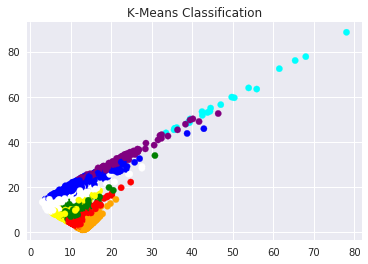

In [88]:
colors = np.array(['red', 'blue', 'yellow', 'green', 'orange', 'cyan', 'white', 'purple'])
#, 'black', 'brown'
plt.scatter(X[:, 0], X[:, 1], c=colors[labels], s=40)
plt.title('K-Means Classification')

In [89]:
X

array([[  7.38533589,   8.69786865,   4.12771987, ...,  15.43103352,
         16.87513315,   6.14374253],
       [  4.91302384,  10.46540045,   4.65772666, ...,  17.75291618,
         13.72380425,   8.47165227],
       [ 14.81733138,   4.0413239 ,   9.9626537 , ...,  22.31653917,
         23.86073905,   6.48894896],
       ..., 
       [ 12.07148666,   4.95076413,   6.95694002, ...,  20.40293271,
         21.70627021,   3.80127452],
       [  8.56368199,   8.15319626,   4.78193673, ...,  18.63496554,
         17.79144849,   6.2949134 ],
       [  5.15619499,  10.38977136,   4.99711452, ...,  17.18058549,
         13.55456926,   8.68560841]])

In [90]:
kmeans_df = pd.DataFrame(X)

In [91]:
kmeans_df.head()

,0,1,2,3,4,5,6,7
0,7.385336,8.697869,4.127720,43.113669,4.757398,15.431034,16.875133,6.143743
1,4.913024,10.465400,4.657727,39.950572,7.833685,17.752916,13.723804,8.471652
2,14.817331,4.041324,9.962654,49.312365,9.327982,22.316539,23.860739,6.488949
3,10.161607,7.452806,5.500530,46.359132,2.720977,19.574219,20.043722,4.727018
4,8.056212,8.183700,3.523722,44.519761,3.036413,18.433932,18.018040,5.097603


#### further analysis

In [92]:
train['labels'] = labels

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
train.corr()

,weaponKillsSuper,weaponKillsMelee,weaponKillsGrenade,abilityKills,assists,totalKillDistance,kills,averageKillDistance,secondsPlayed,deaths,averageLifespan,score,averageScorePerKill,averageScorePerLife,bestSingleGameKills,closeCalls,dominationKills,killsDeathsRatio,killsDeathsAssists,precisionKills,resurrectionsPerformed,resurrectionsReceived,suicides,weaponKillsAutoRifle,weaponKillsFusionRifle,weaponKillsHandCannon,weaponKillsMachinegun,weaponKillsPulseRifle,weaponKillsRocketLauncher,weaponKillsScoutRifle,weaponKillsShotgun,weaponKillsSniper,weaponKillsRelic,weaponKillsSideArm,weaponKillsSword,weaponBestType,winLossRatio,defensiveKills,longestKillSpree,longestSingleLife,mostPrecisionKills,offensiveKills,orbsDropped,orbsGathered,relicsCaptured,remainingTimeAfterQuitSeconds,zonesCaptured,zonesNeutralized,combatRating,longestKillDistance,highestCharacterLevel,highestLightLevel,labels
weaponKillsSuper,1.000000,0.466985,0.435941,0.485990,0.486082,0.410024,0.456311,0.051920,0.495170,0.514949,0.063827,0.493027,0.048693,0.187024,0.299423,0.484099,0.386855,0.157493,0.163801,0.388483,0.363191,0.366726,0.482638,0.298599,0.295983,0.322900,0.334257,0.321226,0.310782,0.361132,0.383577,0.306691,0.238354,0.303961,1.000000,0.080524,0.102895,0.475604,0.332687,0.109711,0.273034,0.447194,0.451516,0.480173,0.456368,0.337622,0.467215,0.477218,0.138768,0.248875,0.261795,0.282406,0.169514
weaponKillsMelee,0.466985,1.000000,0.817931,0.914798,0.815269,0.747791,0.829185,0.072279,0.829445,0.851880,0.088496,0.821446,-0.095304,0.201352,0.473957,0.750999,0.746649,0.323087,0.315810,0.721910,0.661896,0.658086,0.769083,0.562849,0.480135,0.580353,0.640270,0.616984,0.659680,0.573974,0.745535,0.523676,0.210379,0.449897,0.466985,0.142374,0.255491,0.736152,0.501874,0.109382,0.419663,0.814231,0.802828,0.805369,0.649289,0.492884,0.749025,0.708945,0.272036,0.396387,0.237426,0.257898,0.312283
weaponKillsGrenade,0.435941,0.817931,1.000000,0.939451,0.915591,0.877298,0.906903,0.221828,0.920889,0.916890,0.189397,0.900422,-0.087254,0.225893,0.458068,0.837746,0.786289,0.347736,0.349482,0.832049,0.714306,0.702262,0.805990,0.623356,0.535698,0.691689,0.731074,0.708786,0.750667,0.660434,0.733478,0.633195,0.388436,0.510797,0.435941,0.124944,0.277979,0.820220,0.517956,0.109567,0.445863,0.830239,0.870412,0.874665,0.695557,0.514751,0.825449,0.777667,0.252335,0.402487,0.236115,0.274670,0.337690
abilityKills,0.485990,0.914798,0.939451,1.000000,0.947836,0.910934,0.960820,0.188452,0.957750,0.956815,0.181969,0.952527,-0.089541,0.258488,0.508411,0.873770,0.843395,0.387956,0.385866,0.877367,0.751595,0.742917,0.848621,0.668015,0.535994,0.728493,0.777606,0.751041,0.791374,0.671406,0.812971,0.656110,0.389185,0.532504,0.485990,0.133191,0.305236,0.850946,0.569888,0.112498,0.480102,0.887293,0.928137,0.925525,0.734898,0.550343,0.853549,0.804336,0.294825,0.432441,0.254294,0.290205,0.353034
assists,0.486082,0.815269,0.915591,0.947836,1.000000,0.933680,0.953971,0.277536,0.973867,0.971925,0.211742,0.955593,-0.087396,0.251043,0.503697,0.888787,0.838146,0.372553,0.383974,0.900817,0.723852,0.723660,0.845670,0.720031,0.526672,0.747143,0.776222,0.787490,0.770812,0.721393,0.748852,0.665907,0.439354,0.558221,0.486082,0.096743,0.306115,0.887566,0.569404,0.120403,0.511726,0.872418,0.927144,0.939813,0.720581,0.555295,0.888995,0.850640,0.272235,0.450620,0.276352,0.320627,0.362392
totalKillDistance,0.410024,0.747791,0.877298,0.910934,0.933680,1.000000,0.978618,0.346894,0.939780,0.902573,0.292368,0.932630,-0.130161,0.279542,0.512698,0.841302,0.836703,0.469128,0.468803,0.983380,0.769710,0.765869,0.791298,0.688699,0.527356,0.839656,0.828288,0.804560,0.826064,0.697194,0.759312,0.820736,0.520502,0.529102,0.410024,0.113576,0.373499,0.776309,0.598015,0.117635,0.541878,0.797802,0.928149,0.860746,0.666148,0.541180,0.755064,0.696541,0.311821,0.451396,0.226772,0.255550,0.346195
kills,0.456311,0.829185,0.906903,0.960820,0.953971,0.978618,1.000000,0.260952,0.966311,0.945612,0.239426,0.961144,-0.124626,0.273248,0.532211,0.86

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


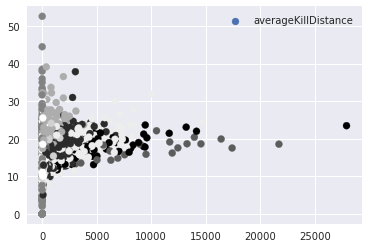

In [107]:
plt.scatter(train['weaponKillsSniper'], train['averageKillDistance'], c=train['labels'])
plt.legend()

In [93]:
train.head(2)

,weaponKillsSuper,weaponKillsMelee,weaponKillsGrenade,abilityKills,assists,totalKillDistance,kills,averageKillDistance,secondsPlayed,deaths,...,orbsGathered,relicsCaptured,remainingTimeAfterQuitSeconds,zonesCaptured,zonesNeutralized,combatRating,longestKillDistance,highestCharacterLevel,highestLightLevel,labels
12282,24.0,1451.0,759.0,3229.0,3004.0,132239.0,9442.0,14.005401,429048.0,7226.0,...,794.0,40.0,53635.0,759.0,429.0,97.541778,170.0,40.0,327.0,2
10084,33.0,1543.0,1042.0,5209.0,5434.0,246363.0,15414.0,15.983067,838218.0,16773.0,...,2127.0,55.0,10942.0,2257.0,1122.0,88.931635,148.0,40.0,399.0,6


In [94]:
train_0 = train.loc[train['labels'] == 0]
train_1 = train.loc[train['labels'] == 1]
train_2 = train.loc[train['labels'] == 2]
train_3 = train.loc[train['labels'] == 3]
train_4 = train.loc[train['labels'] == 4]
train_5 = train.loc[train['labels'] == 5]
train_6 = train.loc[train['labels'] == 6]
train_7 = train.loc[train['labels'] == 7]

In [129]:
pd.set_option('display.max_columns', 416)
train.groupby('labels').describe()

abilityKills                                                         \
              count          mean          std      min       25%      50%   
labels                                                                       
0            4065.0    593.967774   440.185588      0.0    250.00    492.0   
1             440.0   8308.786364  2184.790537   2898.0   6707.25   7978.5   
2            1887.0   2443.545310   851.447045    524.0   1803.50   2336.0   
3            1893.0   1197.746434   717.328657      2.0    658.00   1095.0   
4            1701.0    110.640800   169.840617      0.0     11.00     46.0   
5              23.0  26025.260870  8310.483807  15797.0  20304.00  23265.0   
6            1171.0   4699.004270  1417.776377   1758.0   3672.00   4545.0   
7             101.0  14827.485149  3934.282981   8091.0  12238.00  14255.0   

                         assists                                      \
            75%      max   count          mean          std      min   
labels                                                                 
0         846.0   2960.0  4065.0    678.338007   481.520438      1.0   
1        9589.5  17863.0   440.0   9419.068182  2237.581386   4285.0   
2        2949.5   6042.0  1887.0   2887.540541   924.913556    761.0   
3        1632.0   5350.0  1893.0   1381.155309   765.546763      1.0   
4         143.0   2053.0  1701.0    127.009406   179.445964      0.0   
5       30503.0  47521.0    23.0  25865.565217  7086.126066  16381.0   
6        5443.0  13509.0  1171.0   5366.040991  1400.065907   2287.0   
7       17079.0  28980.0   101.0  16293.613861  3874.555505   9863.0   

                                             averageKillDistance             \
             25%      50%       75%      max               count       mean   
labels                                                                        
0         292.00    583.0    980.00   3051.0              4065.0  13.034545   
1        7836.75   9114.5  10834.25  19755.0               440.0  17.028590   
2        2191.50   2788.0   3473.00   6280.0              1887.0  14.216817   
3         801.00   1283.0   1881.00   4425.0              1893.0  16.800773   
4          17.00     64.0    167.00   2676.0              1701.0  12.271474   
5       20536.50  25632.0  27982.00  49305.0                23.0  17.157062   
6        4309.00   5189.0   6148.00  11992.0              1171.0  15.968304   
7       13629.00  15438.0  18093.00  28933.0               101.0  17.000855   

                                                                         \
             std        min        25%        50%        75%        max   
labels                                                                    
0       2.871160   4.207668  11.163640  12.904656  14.713100  36.454545   
1       3.193014   8.115511  15.059497  16.706179  18.847048  31.917722   
2       2.644936   5.932598  12.464834  14.097358  15.910226  24.117950   
3       3.497470   7.115213  14.449284  16.492431  18.908167  39.127174   
4       4.425055   0.000000   9.727273  11.823529  14.447811  52.600000   
5       2.259789  13.288603  15.793358  17.526382  18.597413  22.124569   
6       3.066519   5.069447  13.883909  15.946566  17.967913  37.854729   
7       2.836486  10.707577  15.360081  16.742253  18.952296  23.653408   

       averageLifespan                                                         \
                 count       mean        std        min        25%        50%   
labels                                                                          
0               4065.0  48.763034   5.641287  33.348018  45.006463  48.166798   
1                440.0  57.013249   9.461784  37.185102  49.978974  55.437222   
2               1887.0  49.527712   5.459101  36.038289  45.743933  48.888318   
3               1893.0  55.188836   8.022802  39.886179  49.802577  53.805317   
4               1701.0  50.047410   8.822694  26.000000  44.708333  48.811502   
5          

In [130]:
train.groupby('labels')[['averageKillDistance', 'averageLifespan']].mean()

,averageKillDistance,averageLifespan
labels,,
0,13.034545,48.763034
1,17.028590,57.013249
2,14.216817,49.527712
3,16.800773,55.188836
4,12.271474,50.047410
5,17.157062,67.563695
6,15.968304,53.781783
7,17.000855,58.052552


## Scoring

In [125]:
from sklearn.metrics import silhouette_score
silhouette_score(kmeans_df, labels)

MemoryError: 

In [131]:
labels.shape

(11281,)

In [132]:
kmeans_df.shape

(11281, 8)

## Improvement

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6, n_iter=7, random_state=10)
svd_df = svd.fit_transform(df)

In [ ]:
svd_df = pd.DataFrame(svd_df)

In [ ]:
svd.explained_variance_